<a href="https://colab.research.google.com/github/ClintJensen/DrawingsProject/blob/master/code/ConvNet/ConvNet_VGG_19_Drawings_block5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Feature extraction from VGG19 architecture layers with weights pre-trained on ImageNet

In [1]:
# Here we use Keras API to process the data by using VGG19 
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd 


###When loading pretrained model output

In [2]:
#Loading a pretrained model
#base_model = tf.keras.models.load_model("vgg19_trained.h5")

# The code below produces this error 
# OSError: SavedModel file does not exist at: vgg19_trained.h5/{saved_model.pbtxt|saved_model.pb}

###When loading ImageNet as a starting point

In [3]:
# Load base model with imagenet pre-trained weights 
base_model = VGG19(weights='imagenet')

574726144/574710816 [==============================] - 7s 0us/step


In [4]:
#To save model locally run this:
#base_model.save("vgg19_trained.h5")

## VGG-19 architecture  

VGG-19 is a 19 layer Convolutional Neural Network  
The **input layer** takes a 224x224x3 image (high, width, color channels)  
The **output layer** is a softmax on 1000 classes  
The **feature extraction** part goes from the input layer to the last max pooling layer  
The **classification** part goes from the last max pooling layer to the output layer  

Simonyan, and Zisserman paper:  
https://arxiv.org/pdf/1409.1556.pdf  
Keras reference:  
https://keras.io/applications/#vgg19    
![VGG-19 architecture](https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

## Model Architecture with layer names

In [5]:
# Here we can see the progression from layer to layer 
# The output shape column shows how the image gets compressed as 
# it pass through the layers
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### If you have downloaded images into your Drive folder or want to save output in those folders

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#When running Colab locally

In [7]:
from google.colab import files

### Code to upload local image files to Colab

- After running the code below, navigate to the folder that holds all the images. Select all the images, and click on the 'open' button.

In [8]:
# Code to upload local image files to Colab
uploaded = files.upload()

Saving DAM001_F_DAPedit.png to DAM001_F_DAPedit.png
Saving DAM001_P_DAPedit.png to DAM001_P_DAPedit.png
Saving DAM001_T_DAPedit.png to DAM001_T_DAPedit.png
Saving DAM002_F_DAPedit.png to DAM002_F_DAPedit.png
Saving DAM002_P_DAPedit.png to DAM002_P_DAPedit.png
Saving DAM002_T_DAPedit.png to DAM002_T_DAPedit.png
Saving DAM003_F_DAPedit.png to DAM003_F_DAPedit.png
Saving DAM003_P_DAPedit.png to DAM003_P_DAPedit.png
Saving DAM003_T_DAPedit.png to DAM003_T_DAPedit.png
Saving DAM3D002_P_DAPedit.png to DAM3D002_P_DAPedit.png
Saving DAM3D003_F_DAPedit.png to DAM3D003_F_DAPedit.png
Saving DAM3D005_T_DAPedit.png to DAM3D005_T_DAPedit.png
Saving DAM3D006_P_DAPecit.png to DAM3D006_P_DAPecit.png
Saving DAM3D007_P_DAPedit.png to DAM3D007_P_DAPedit.png
Saving DAM3D008_T_DAPedit.png to DAM3D008_T_DAPedit.png
Saving DAM3D009_T_DAPedit.png to DAM3D009_T_DAPedit.png
Saving DAM3D011_P_DAPedit.png to DAM3D011_P_DAPedit.png
Saving DAM3D012_P_DAPedit.png to DAM3D012_P_DAPedit.png
Saving DAM3D013_T_DAPedit.pn

# If importing images through GitHub. 

* There are some DrawingsProject images on Github, but they are not the ones used in the most up-to-date version of the study.

In [9]:
# If images are stored in GitHub, by running this we clone the data into Colab
# Run this just once per session

#! git clone https://github.com/ClintJensen/DrawingsProject

###To view files in GitHub folder

In [10]:
# Now repo data is available in Colab local environment
#!ls DrawingsProject

In [11]:
# You can run this if you want to check the path for a single image
# ! ls DrawingsProject/data/DAP_NEXT_Images/

# Load and reshape the image to be feed into the model

In [12]:
# Load and reshape the image to be feed into the model

#Path using Tim's local network
#img_path = 'C:/Users/ttrog/Box/Models/VGGN/Cubes/DAM3D001_P_CUAedit.jpg'
#Path using Clint Jensen's GitHub
#img_path = '../content/DrawingsProject/data/DAP_NEXT_Images/DAM001_F_DAPedit.png'

img_path = '../content/DAM001_F_DAPedit.png'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Selecting layer for feature extraction 

In [13]:
# First pick the layer for feature extraction
# A list of the layers' names is obtained by running "base_model.summary()"
feature_layer = "block5_pool"# Here we pick the maxpooling layer in block 5

# To check other layers
# feature_layer = "fc1"
# feature_layer = "fc2 "
# feature_layer = "block1_pool "
# feature_layer = "block1_conv1 "
 
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer(feature_layer).output)

#### Setting up feature extraction across full model based on feature selected 

In [14]:
# Do the feature extraction
block5_pool_features = model.predict(x)

In [15]:
# In block 5, we can check that feature has the same shape that the maxpooling 
# layer in block 5 (above drawing)
# Print tensor shape
print (block5_pool_features.shape)

(1, 7, 7, 512)


In [16]:
# Print extracted feature as a tensor (i.e., feature)
# print(block5_pool_features)

In [17]:
# Print extracted feature flattened as a 1D vector
vgg19_feature_np = np.array(block5_pool_features)
vgg19_feature_np.flatten()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Feature extraction from all images based on specified layer

In [18]:
# Get the drawings filenames from directory 
from os import listdir
from os.path import isfile, join

# If relative path doesn't work, change path as nedeed
# path = 'C:/Users/ttrog/Box/Models/VGGN/Cubes/'
# path = '../content/DrawingsProject/data/DAP_NEXT_Images/'

path = '../content/'
filenames = [f for f in listdir(path) if isfile(join(path, f))]
len(filenames) # This should yield the same number of images within the image file

308

In [19]:
# Let's create a list to save flattened tensors as vectors
vgg19_feature_list = []

# Loop over filenames and append flattened tensor to vector list
for fname in filenames:
  # This part of the loop reshape and preprocess the input images 
  img_path = path + fname
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  # This part of the loop extract the featues and flatten the tensors to vectors
  vgg19_feature = model.predict(x)
  vgg19_feature_np = np.array(vgg19_feature)
  vgg19_feature_list.append(vgg19_feature_np.flatten())
  

In [20]:
# Let's pass the VGG19 feature list to a numpy array
vgg19_feature_list_np = np.array(vgg19_feature_list)
type(vgg19_feature_list_np)
print(vgg19_feature_list_np.shape)

(308, 25088)


#### Exporting Files

In [21]:
#And write it to a csv file
#To save within the base content file of Colab
#np.savetxt("vgg19_DAP_study1_3_block5_pool.csv", vgg19_feature_list_np, delimiter=",")

#To save within a specific drive file update this path
np.savetxt("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_block5_pool_450_256/vgg19_DAP_study1_3_block5_pool.csv", vgg19_feature_list_np, delimiter=",")


In [22]:
#And write filenames to a csv file
df = pd.DataFrame(filenames)

##To save within the base content file of Colab
#df.to_csv("filenames_vgg19_DAP_study1_3_block5_pool.csv")

#To save within a specific drive file update this path
df.to_csv("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_block5_pool_256_256/filenames_vgg19_DAP_study1_3_block5_pool.csv")

# Hierarchical clustering on drawings with vectors extracted from VGG19

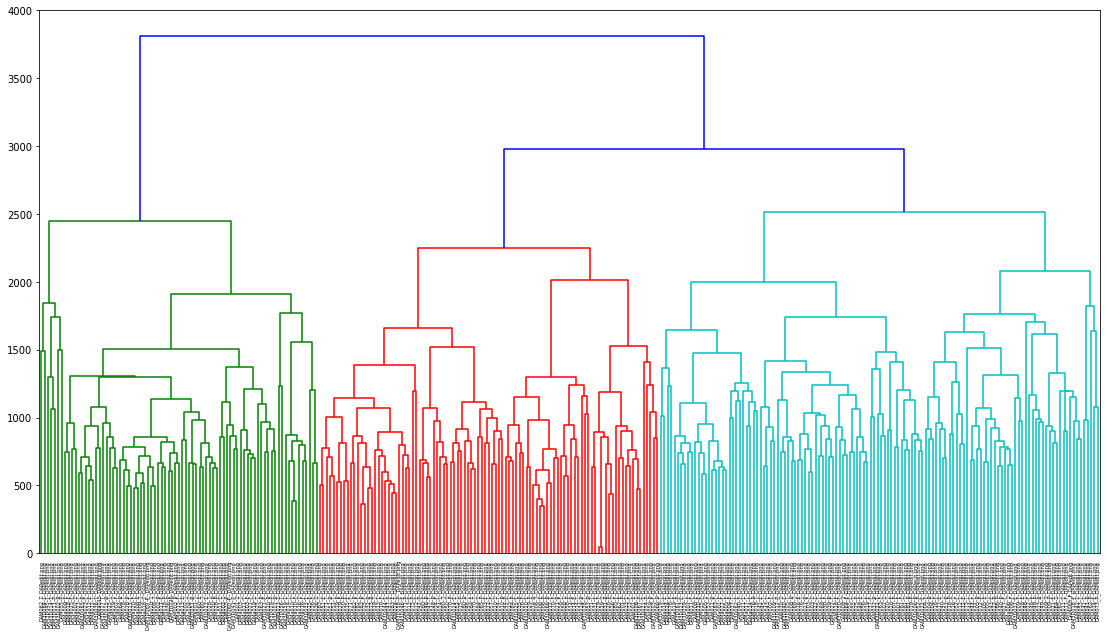

In [23]:
# Let's use scipy to plot a dendogram to do hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

# Let's use the 'ward' method to compute the distance between clusters which 
# minimize the variance between clusters
linked = linkage(vgg19_feature_list_np, 'ward')

# Use filenames as label list
labelList = filenames

# Plot the dendogram as a descendeing tree
plt.figure(figsize=(19, 10))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [24]:
# Based on the dendogram, it looks like we have 11 clusters
# Let's use sklearn to perform the hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

k = 11
hclustering = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
hclustering.fit(vgg19_feature_list_np)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=11)

In [25]:
# Print the cluster to which each image was assigned to
print(hclustering.labels_)  

[ 8  5  5  1  9  7  6  6  1  5  1  7  7  4  6  5  2  4  6  4  8  4  6  7
  2  4  9  8  9  4  5  5  4  5  2  4  5  2 10  8  7  5  5  6  8  9  9  5
  2  9  5  9  9  9  8  2  3  4  7  5  1  6  8  7  2  2  6  8  5  5  9  2
  2  5  9  1  4  9  8  5  3  0  2  8  7  2  2  9  2  9  2  2  8  9  2  5
  8  4  5  6  6  5  7  9  7  9  9  7  5  2  6  9  9  6  7  6  8  2  1  5
  9  9  6  2  9  2  5  6  9  9  7  6  6  5  5  2  4  6  9  2  9  8  5  8
  0  2  6  5  9  6  7  1  7  6  6  6  5  6  5  9  5  9  6  6  5  9  5  2
  9  5  6  9  9  1  2  7  7  7  3  5  2  6  1  4  9  2  1  5  9  5  7  0
  2  8  2  1  6  5  6  9 10  3  0  5  5  2  6  8  8  9  8  5  6  4  7  5
  5  6  5  9  8  8  6  9  2  5  6  9  4  9  5  9  9  5  9  6  4  5  2  5
  6  9  2  2  9  0  6  7  6  3  6  8  1  6  9  2  9  4  9  9  2  9  7  9
  6  9  9  2  5  8  9  5  2  2  6  8  4  5  9  8  5  7  2  8  4  5  7  2
  8  2  4  2  6  9  6  6  2  6  9  9  6  9  7  8  5  9  8  2]


#### Exporting Files

In [28]:
#And write it to a csv file

#To save within the base content file of Colab
#np.savetxt("hclustering.clusterValues_ConvNet_DAP_study1_3_block5_pool.csv", hclustering.labels_, delimiter=",")

#To save within a specific drive file update this path
np.savetxt("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_block5_pool_450_256/hclustering.clusterValues_ConvNet_DAP_study1_3_block5_pool.csv", hclustering.labels_, delimiter=",")

In [29]:
#To save within the base content file of Colab
#pd.DataFrame(labelList).to_csv("hclustering.imageLabels_ConvNet_DAP_study1_3_block5_pool.csv", header=None, index=None)

#To save within a specific drive file update this path
pd.DataFrame(labelList).to_csv("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_block5_pool_450_256/hclustering.imageLabels_ConvNet_DAP_study1_3_block5_pool.csv", header=None, index=None)

## Plotting drawings by cluster

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import pandas as pd

In [31]:
# First, let's create a 2D pandas dataframe 
# this is necessary to plot the images by cluster later

# get filenames as a numpy aray
filenames_np = np.asarray(filenames)

# get cluster labels as a numpr array
clusters_np = hclustering.labels_

# create pandas dataframe stacking numpy arrays by column
drawings_df = pd.DataFrame({'filenames_np':filenames_np, 'clusters_np':clusters_np})

print(type(drawings_df))
print("Shape: ", drawings_df.shape)
print(drawings_df.head())

<class 'pandas.core.frame.DataFrame'>
Shape:  (308, 2)
             filenames_np  clusters_np
0    DAM021_T_DAPedit.png            8
1    DAM084_T_DAPedit.png            5
2    DAM071_T_DAPedit.png            5
3  DAM3D059_T_DAPedit.png            1
4   DAMa021_F_DAPedit.png            9


In [32]:
drawings_df

,filenames_np,clusters_np
0,DAM021_T_DAPedit.png,8
1,DAM084_T_DAPedit.png,5
2,DAM071_T_DAPedit.png,5
3,DAM3D059_T_DAPedit.png,1
4,DAMa021_F_DAPedit.png,9
...,...,...
303,DAM037_T_DAPedit.png,8
304,DAM047_T_DAPedit.png,5
305,DAM3D060_P _DAPedit.png,9
306,DAMa024_F_DAPedit.png,8


In [33]:
#And write it to a csv file
drawings_df = pd.DataFrame(drawings_df)

#pd.DataFrame(labelList).to_csv("drawings_df.csv", header=None, index=None)

##To save within the base content file of Colab
# drawings_df.to_csv("ConvNet_DAP_study1_3_block5_pool_11clust.csv", index=None)

#To save within a specific drive file update this path
drawings_df.to_csv("../content/drive/MyDrive/Colab Notebooks/DrawingsProject/data/ConvNet_DAP_study1_3_block5_pool_450_256/ConvNet_DAP_study1_3_block5_pool_11clust.csv", index=None)

###Subsetting for Cluster Groups


In [34]:
# Let's subset the dataframe into 11 dataframes by cluster group

def subCluster(subcluster):
    '''Function to subset dataframes by cluster'''
    cluster = drawings_df.loc[drawings_df['clusters_np'] == subcluster]
    return cluster

cluster_1 = subCluster(0)
print("Length cluster 1: ", len(cluster_1))
print(cluster_1.head())

cluster_2 = subCluster(1)
print("Length cluster 2: ", len(cluster_2))
print(cluster_2.head())

cluster_3 = subCluster(2)
print("Length cluster 3: ", len(cluster_3))
print(cluster_3.head())

cluster_4 = subCluster(3)
print("Length cluster 4: ", len(cluster_4))
print(cluster_4.head())

cluster_5 = subCluster(4)
print("Length cluster 5: ", len(cluster_5))
print(cluster_5.head())

cluster_6 = subCluster(5)
print("Length cluster 6: ", len(cluster_6))
print(cluster_6.head())

cluster_7 = subCluster(6)
print("Length cluster 7: ", len(cluster_7))
print(cluster_7.head())

cluster_8 = subCluster(7)
print("Length cluster 8: ", len(cluster_8))
print(cluster_8.head())

cluster_9 = subCluster(8)
print("Length cluster 8: ", len(cluster_9))
print(cluster_9.head())

cluster_10 = subCluster(9)
print("Length cluster 10: ", len(cluster_10))
print(cluster_10.head())

cluster_11 = subCluster(10)
print("Length cluster 11: ", len(cluster_11))
print(cluster_11.head())

Length cluster 1:  5
             filenames_np  clusters_np
81   DAM041_T_DAPedit.png            0
144  DAM041_P_DAPedit.png            0
191  DAM062_P_DAPedit.png            0
202  DAM074_F_DAPedit.png            0
245  DAM073_P_DAPedit.png            0
Length cluster 2:  12
              filenames_np  clusters_np
3   DAM3D059_T_DAPedit.png            1
8     DAM025_F_DAPedit.png            1
10   DAMa010_T_DAPedit.png            1
60   DAMa013_T_DAPedit.png            1
75   DAMa016_F_DAPedit.png            1
Length cluster 3:  46
            filenames_np  clusters_np
16  DAM004_P_DAPedit.png            2
24   DAM065_F_DAPedt.png            2
34  DAM004_T_DAPedit.png            2
37  DAM043_F_DAPedit.png            2
48  DAM005_P_DAPedit.png            2
Length cluster 4:  5
               filenames_np  clusters_np
56   DAM3D045_T_DAPedit.png            3
80   DAM3D002_P_DAPedit.png            3
178  DAM3D014_T_DAPedit.png            3
201    DAM055_P_DAPedit.png            3
249  DA

In [35]:
# Let's check cluster size to get a better idea of how to 
# layout the grid for plotting

print(len(cluster_1))
print(len(cluster_2))
print(len(cluster_3))
print(len(cluster_4))
print(len(cluster_5))
print(len(cluster_6))
print(len(cluster_7))
print(len(cluster_8))
print(len(cluster_9))
print(len(cluster_10))
print(len(cluster_11))

5
12
46
5
20
54
48
25
29
62
2


##Function to save plots for each cluster

In [58]:
#########################################
# Function to save plots for each cluster
#########################################


def plotClusters(cluster, nrows, ncols, save_path, cluster_name):
    '''Plot images for a clusterin a grid.
     
     Arguments:
     cluster      -- cluster dtaframe name
     nrows        -- number of rows in the plot
     ncols        -- number of cols in the plot
     save_path    -- string path name to save plot
     cluster_name -- string name to save plot 
    '''
    assert isinstance(cluster, pd.DataFrame), "cluster is not pandas dataframe"
    assert isinstance(nrows, int)
    assert isinstance(ncols, int)
    assert isinstance(save_path, str)
    assert isinstance(cluster_name, str)
    
    # Image parameters
    width = 10
    height = 10
    fig=plt.figure(figsize=(18, 18)) 
    
    # We need to create a counter to loop over images and allocate 
    # the image in the right position in the grid
    pic_index = 0 
    
    # Loop over each pic and plot it in the the grid
    # .iterrows() is a method that works with pandas dataframes
    for index, row in (cluster.iterrows()): 
      pic_index += 1
      # Create grid to plot images
      fig.add_subplot(nrows, ncols, pic_index)
      img_path = path + row['filenames_np']
      img=mpimg.imread(img_path)
      imgplot = plt.imshow(img)
      # get rid off axis and grid within each pic
      plt.axis('off')
    save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_block5_pool_11clust_450_256/'
    
    
    plt.savefig(save_path+cluster_name+'.png', bbox_inches='tight')
    plt.show()

###Plot Cluster 1

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_1))

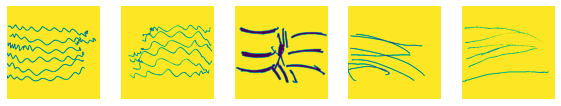

In [47]:
################################
# Plot cluster 1 Function approach
################################

# pick the cluster to plot
cluster = cluster_1

# Define grid shape
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_block5_pool_11clust_450_256/'


cluster_name = 'cluster_1'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [48]:
# # pick the cluster to plot
# cluster = cluster_1

# # Define grid shape parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 



# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')
# #plt.savefig('cluster_1_block5_pool_drawings_DAP.png', dpi=200)
# plt.show()


###Plot Cluster 2

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_2))

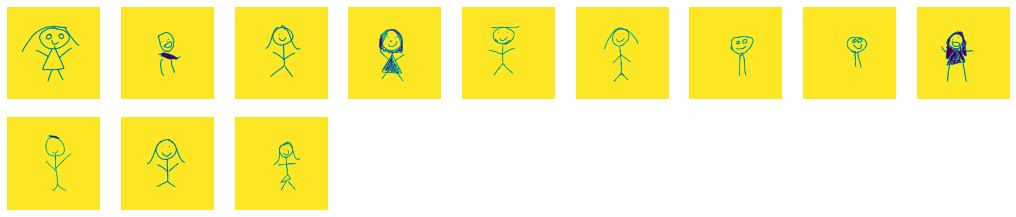

In [49]:
################################
# Plot cluster 2 Function approach
################################

# pick the cluster to plot
cluster = cluster_2

# Define grid shape
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_block5_pool_11clust_450_256/'
    

cluster_name = 'cluster_2'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [50]:
# # Let's plot all images classified together in cluster 2

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_2

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_2_block5_pool_drawings_DAP.png', dpi=200)
# plt.show()

###Plot Cluster 3

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_3))

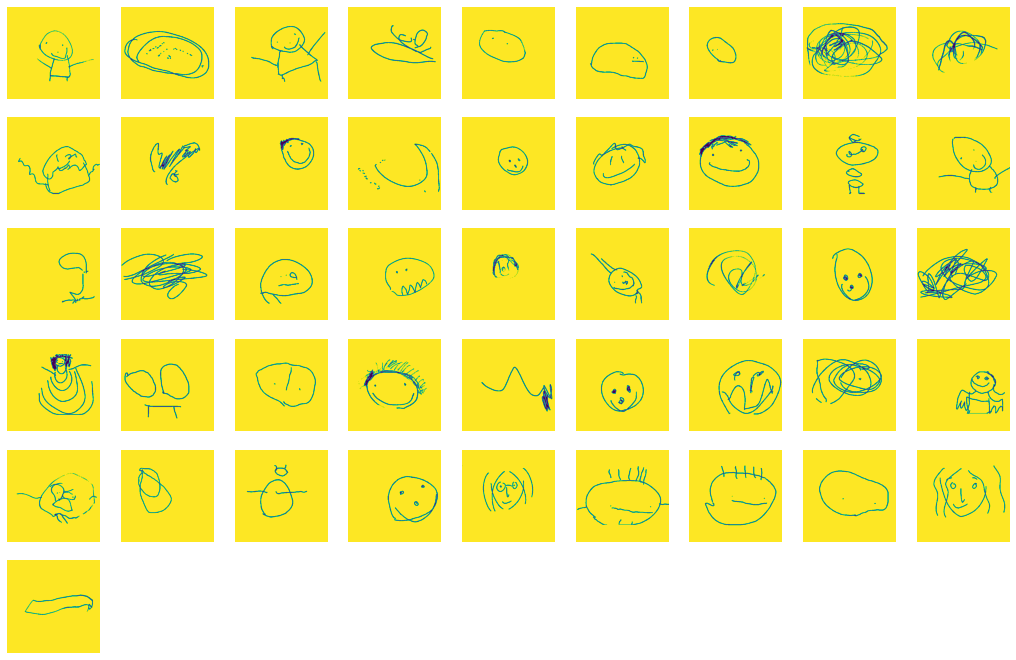

In [51]:
################################
# Plot cluster 3 Function approach
################################

# pick the cluster to plot
cluster = cluster_3

# Define grid shape
nrows = 9
ncols = 9

# to save
save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_block5_pool_11clust_450_256/'
    

cluster_name = 'cluster_3'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [52]:
# # Let's plot all images classified together in cluster 3

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_3

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_3_block5_pool_drawings_DAP.png', dpi=200)
# plt.show()

###Plot Cluster 4

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_4))

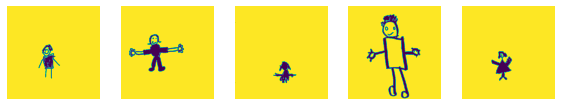

In [53]:
################################
# Plot cluster 4 Function approach
################################

# pick the cluster to plot
cluster = cluster_4

# Define grid shape
nrows = 9
ncols = 9

# to save
#save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_block5_pool_11clust_450_256/'
    

cluster_name = 'cluster_4'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [54]:
# # Let's plot all images classified together in cluster 4

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_4

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_4_block5_pool_drawings_DAP.png', dpi=200)
# plt.show()

###Plot Cluster 5

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_5))

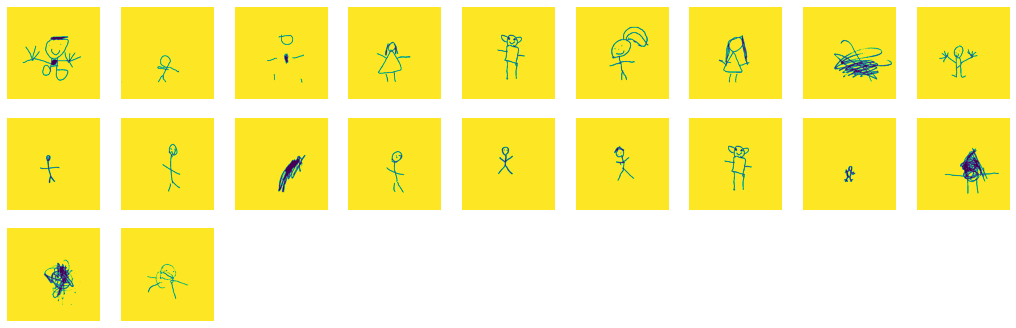

In [55]:
################################
# Plot cluster 5 Function approach
################################

# pick the cluster to plot
cluster = cluster_5

# Define grid shape
nrows = 9
ncols = 9

# to save
#save_path = '../content/drive/MyDrive/Colab Notebooks/DrawingsProject/figures/ConvNet_DAP_study1_3_block5_pool_11clust_450_256/'
    

cluster_name = 'cluster_5'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [56]:
# # Let's plot all images classified together in cluster 5

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_5

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_5_block5_pool_drawings_DAP.png', dpi=200)
# plt.show()

###Plot Cluster 6

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_6))

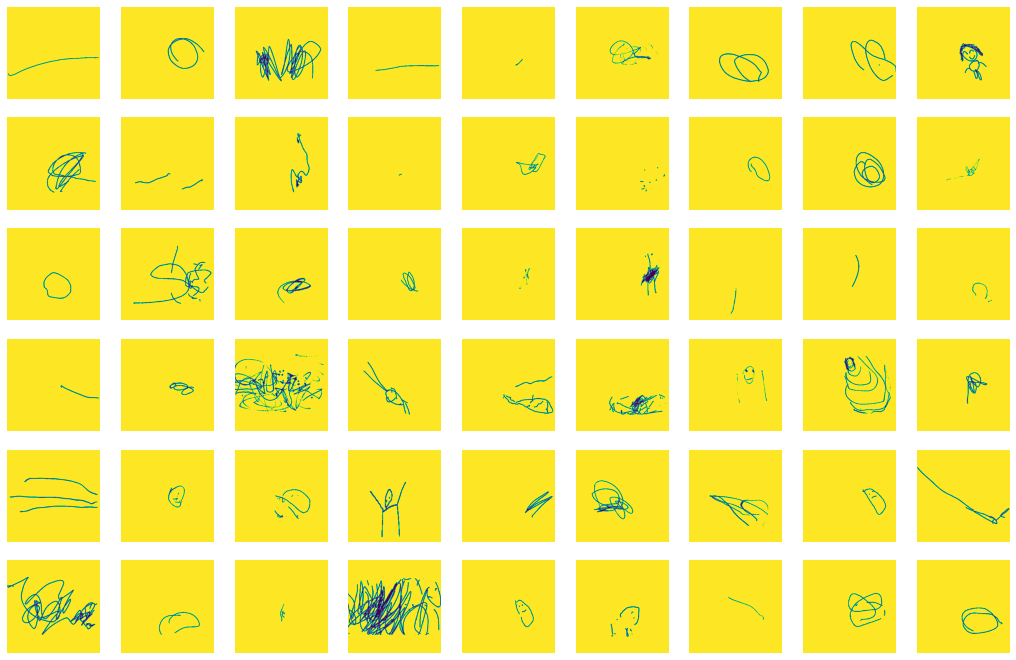

In [57]:
################################
# Plot cluster 6 Function approach
################################

# pick the cluster to plot
cluster = cluster_6

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_6'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [59]:
# # Let's plot all images classified together in cluster 6

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_6

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_6_block5_pool_drawings_DAP.png', dpi=200)
# plt.show()

###Plot Cluster 7

In [ ]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_7))

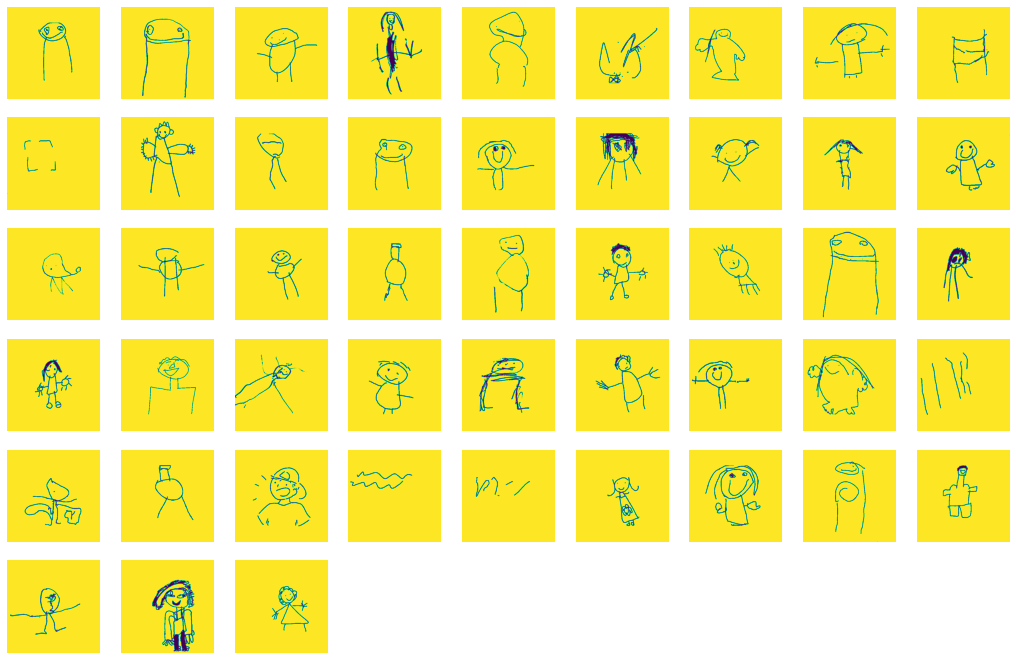

In [60]:
################################
# Plot cluster 7 Function approach
################################

# pick the cluster to plot
cluster = cluster_7

# Define grid shape
nrows = 9
ncols = 9   

cluster_name = 'cluster_7'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [61]:
# # Let's plot all images classified together in cluster 7

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_7

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_7_block5_pool_drawings.png', dpi=200)
# plt.show()

###Plot Cluster 8

In [62]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_8))

25


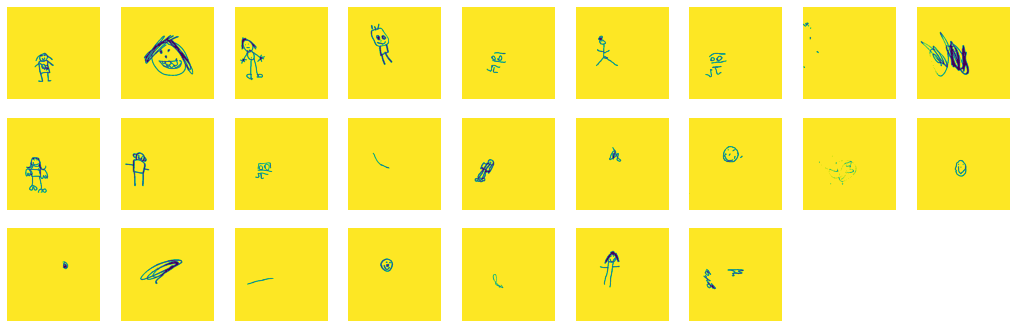

In [63]:
################################
# Plot cluster 8 Function approach
################################

# pick the cluster to plot
cluster = cluster_8

# Define grid shape
nrows = 9
ncols = 9   

cluster_name = 'cluster_8'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

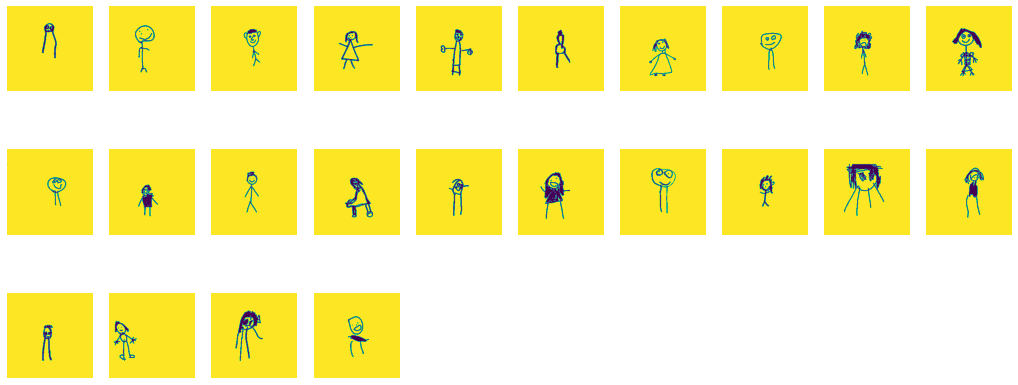

In [ ]:
# # Let's plot all images classified together in cluster 8

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_8

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_8_block5_pool_drawings.png', dpi=200)
# plt.show()

###Plot Cluster 9

In [64]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_9))

29


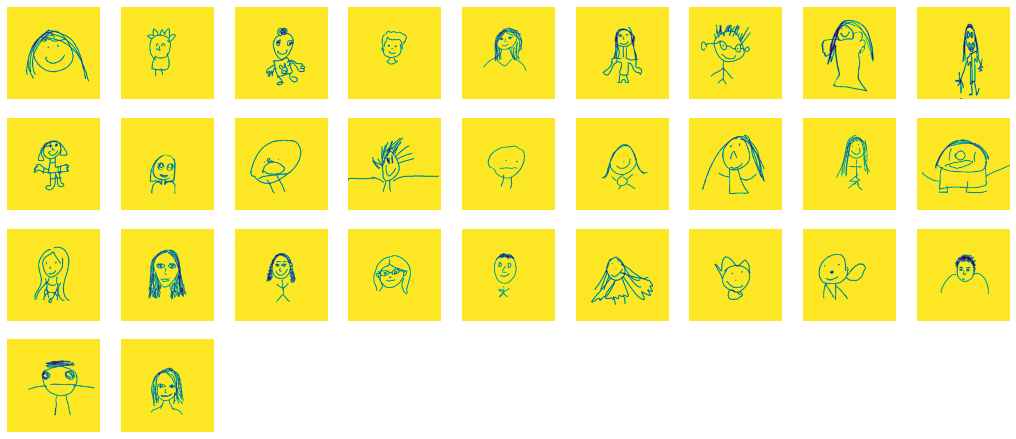

In [65]:
################################
# Plot cluster 9 Function approach
################################

# pick the cluster to plot
cluster = cluster_9

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_9'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [66]:
# # Let's plot all images classified together in cluster 9

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_9

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# #plt.savefig('cluster_9_block5_pool_drawings.png', dpi=200)
# plt.show()

###Plot Cluster 10

In [67]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_10))

62


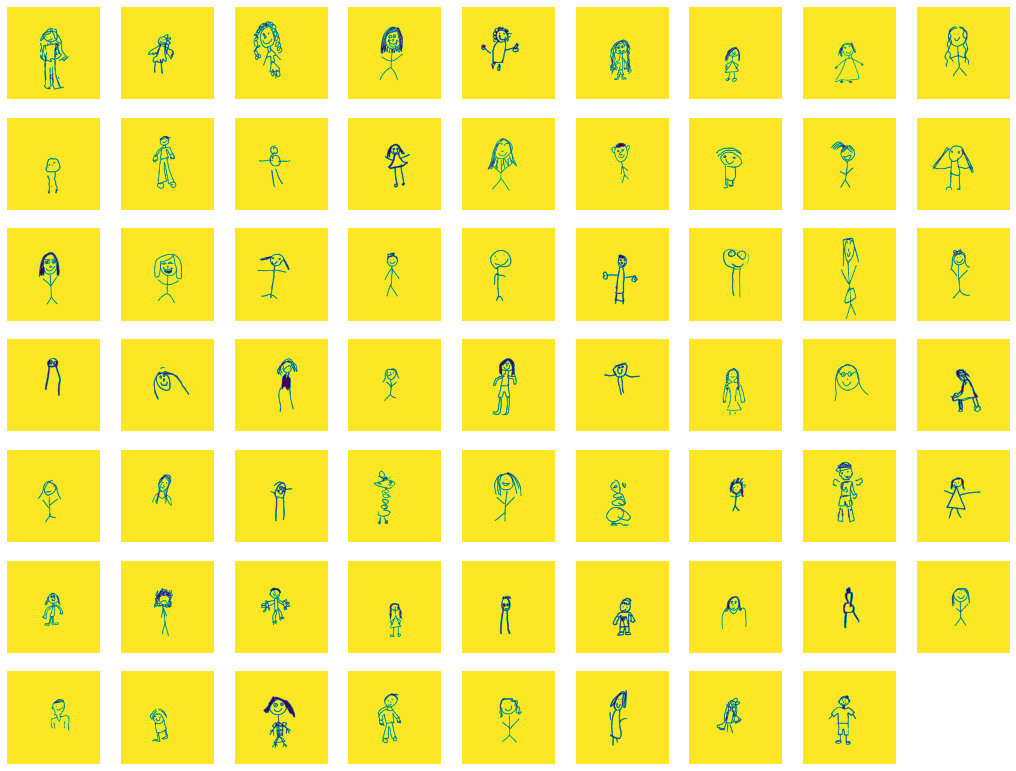

In [68]:
################################
# Plot cluster 10 Function approach
################################

# pick the cluster to plot
cluster = cluster_10

# Define grid shape
nrows = 9
ncols = 9

cluster_name = 'cluster_10'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [69]:
# # Let's plot all images classified together in cluster 10

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_10

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# plt.savefig('cluster_10_block5_pool_drawings_DAP.png', dpi=200)
# plt.show()

###Plot Cluster 11

In [70]:
# Let's check cluster size to get a better idea of how to # layout the grid for plotting

print(len(cluster_11))

2


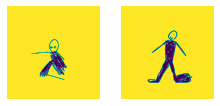

In [71]:
################################
# Plot cluster 11 Function approach
################################

# pick the cluster to plot
cluster = cluster_11

# Define grid shape
nrows = 9
ncols = 9   

cluster_name = 'cluster_11'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

In [72]:
# # Let's plot all images classified together in cluster 11

# # Image parameters
# width = 10
# height = 10
# nrows = 7
# ncols = 10
# fig=plt.figure(figsize=(18, 18)) 

# # We need to create a counter to loop over images and allocate 
# # the image in the right position in the grid
# pic_index = 0 

# cluster = cluster_11

# # Loop over each pic and plot it in the the grid
# # .iterrows() is a method that works with pandas dataframes
# for index, row in (cluster.iterrows()): 
#   pic_index += 1
#   # Create grid to plot images
#   fig.add_subplot(nrows, ncols, pic_index)
#   img_path = path + row['filenames_np']
#   img=mpimg.imread(img_path)
#   imgplot = plt.imshow(img)
#   # get rid off axis and grid within each pic
#   plt.axis('off')

# @plt.savefig('cluster_11_block5_pool_drawings_DAP.png', dpi=200)
# plt.show()